In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sales = pd.read_csv("sales.csv")
sales

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...,...
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


In [2]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


In [3]:
sales.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
sales.drop_duplicates(subset=['transaction_id', 'product_id'], keep='first', inplace=True)

In [5]:
sales['timestamp'] = pd.to_datetime(sales['timestamp'])
sales['transaction_id'] = sales['transaction_id'].astype('category')
sales['product_id'] = sales['product_id'].astype('category')
sales['date']=sales['timestamp'].dt.date
sales = sales.sort_values('date', ascending = True)
sales

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,date
7000,69f2a397-301b-423d-8552-1e992ff5d129,2022-03-01 17:18:56,79eab594-7c8c-4868-af6d-3bf0996b5010,medicine,standard,11.49,4,45.96,e-wallet,2022-03-01
1575,9423c4e4-ce2e-42a3-bc07-0ad764e1ef21,2022-03-01 15:24:44,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,vegetables,basic,1.49,1,1.49,debit card,2022-03-01
1576,5e5a69f6-58e4-44ea-b72d-8780c8a6266e,2022-03-01 18:59:55,89968f6a-b575-46ff-b71e-2238826be41b,vegetables,premium,1.49,4,5.96,credit card,2022-03-01
1237,5b9dee6e-0424-429a-b5fd-be4189d8b850,2022-03-01 16:12:00,a13bd36b-acd1-402a-a009-4d1472e5e34a,vegetables,gold,1.99,2,3.98,debit card,2022-03-01
6427,75c315c0-bd47-44aa-9a3f-665afeb0a206,2022-03-01 18:19:55,b9c11cb8-14ab-4d09-96ce-5ecf041999d3,baby products,standard,15.99,3,47.97,e-wallet,2022-03-01
...,...,...,...,...,...,...,...,...,...,...
7031,f0cc548d-2cdc-496f-8c39-33a7f1baccd0,2022-03-07 13:17:33,100ab1ec-39f5-41bd-984f-485039575827,medicine,premium,19.99,1,19.99,cash,2022-03-07
2355,b5345fd9-0852-4fb4-b164-60b103ed7436,2022-03-07 19:27:22,0f80f0b5-2488-46e1-a8b7-8bb24be25a40,frozen,non-member,13.19,2,26.38,credit card,2022-03-07
2353,3d503a64-9584-49f7-989c-4ab6ab786a93,2022-03-07 12:58:19,371af9e4-5eae-4b90-b842-d7e532fa9943,frozen,standard,11.49,3,34.47,e-wallet,2022-03-07
954,a93462a1-1e4d-43a8-ae0c-c1dfcd0ba76a,2022-03-07 17:34:02,35e00193-aa27-4121-87f4-6ac0d8a8671f,fruit,non-member,0.49,2,0.98,cash,2022-03-07


In [6]:
st_levels = pd.read_csv("sensor_stock_levels.csv")
st_levels

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22
...,...,...,...,...,...
14995,14995,b9bf6788-09f3-490b-959b-dc5b55edb4b6,2022-03-04 10:52:50,e37658de-3649-4ddb-9c73-b868dd69d3fe,0.66
14996,14996,9ff1cc01-020f-491a-bafd-13552dccff44,2022-03-02 12:25:48,fbeb39cc-8cd0-4143-bdfb-77658a02dec9,0.99
14997,14997,4d8101de-e8a2-4af9-9764-7a3a22aa7084,2022-03-03 17:36:44,8e21dcec-d775-4969-8334-05a37a5fd189,0.72
14998,14998,5f2a7b1e-b3c4-4395-8425-c960e22f701d,2022-03-02 19:42:47,9708cf5b-aa69-4320-a013-9d234c40e63f,0.95


In [7]:
st_levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15000 non-null  int64  
 1   id                   15000 non-null  object 
 2   timestamp            15000 non-null  object 
 3   product_id           15000 non-null  object 
 4   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 586.1+ KB


In [8]:
st_levels.drop_duplicates(subset=['id', 'product_id'], keep='first', inplace=True)

In [9]:
st_levels.drop('Unnamed: 0', axis = 1, inplace = True)
st_levels['timestamp'] = pd.to_datetime(st_levels['timestamp'])
st_levels['product_id'] = st_levels['product_id'].astype('category')
st_levels['date']=st_levels['timestamp'].dt.date
st_levels = st_levels.sort_values('date', ascending = True)
st_levels = st_levels.sort_values('date', ascending = True)
st_levels

,id,timestamp,product_id,estimated_stock_pct,date
7414,abcdc3ab-c23c-45aa-bcf7-e26ab5349570,2022-03-01 12:57:24,00e120bb-89d6-4df5-bc48-a051148e3d03,0.85,2022-03-01
766,ef6ac34a-3307-4370-8d2a-51749e3efe99,2022-03-01 09:37:52,1dbe2caf-d1ed-486d-be49-13697c170a30,0.50,2022-03-01
767,7184c870-cd94-4261-a1b1-4c773f772120,2022-03-01 13:27:53,19911e58-7ae3-4d25-aabf-9682f92cbf96,0.27,2022-03-01
768,099bb3c3-eebb-4dcd-bb7d-18fc3e4b3d40,2022-03-01 15:06:56,0cb046e3-a86b-47ae-9751-3b0f9c596f99,0.16,2022-03-01
13153,4a08c356-12c0-42dd-9700-9b50198e6b72,2022-03-01 15:09:12,31dc85c1-1c5f-4d5a-a79a-1a302c27192c,0.62,2022-03-01
...,...,...,...,...,...
5419,8a5a4de8-3715-4cf6-be45-73c471d2b560,2022-03-07 09:33:43,2913e825-a4cb-4ad7-8dbf-387af8a379ae,0.95,2022-03-07
5433,577c9bd7-15c9-427a-8420-62f5569966c5,2022-03-07 15:11:05,bd979a49-2c7f-4d2d-9d09-a913b7460dd0,0.59,2022-03-07
5446,c104462a-c665-4045-b6a1-a5654ecd5c12,2022-03-07 18:06:59,14736243-d346-438f-9535-d80fcb9f3882,0.63,2022-03-07
5263,7ef6fd93-0045-4036-9901-6c9a7280486f,2022-03-07 14:29:04,8850dc95-5d7f-4f18-ba68-78ec90755ed1,0.51,2022-03-07


In [10]:
storage = pd.read_csv("sensor_storage_temperature.csv")
storage

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38
...,...,...,...,...
23885,23885,17bcff56-9965-4e9f-ad5f-107f0f3be93f,2022-03-01 10:40:43,-1.46
23886,23886,51d4eb44-04bd-4d6a-b777-0653bc173303,2022-03-05 17:07:49,-19.37
23887,23887,bbcacfc4-3b59-47ee-b9e1-7dd3bd588748,2022-03-01 16:15:41,-2.89
23888,23888,5c4d567b-4bcf-4fcd-86b7-e2db5de6e439,2022-03-07 14:44:52,-2.56


In [11]:
storage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   23890 non-null  int64  
 1   id           23890 non-null  object 
 2   timestamp    23890 non-null  object 
 3   temperature  23890 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 746.7+ KB


In [12]:
storage.drop('Unnamed: 0', axis = 1, inplace = True)
storage['timestamp'] = pd.to_datetime(storage['timestamp'])
storage['date']=storage['timestamp'].dt.date
storage = storage.sort_values('date', ascending = True)
storage

,id,timestamp,temperature,date
23889,589c28e1-f1f3-4efb-af6d-9f194c4d7d5b,2022-03-01 16:33:41,0.13,2022-03-01
16041,ac7384ae-d98a-499b-bdaf-98afac8e5bb8,2022-03-01 09:22:01,-18.90,2022-03-01
16042,4e73af25-c1b8-4292-b1dd-94b988fc1839,2022-03-01 15:40:10,28.59,2022-03-01
16053,bb37593f-0e90-4de6-ac2f-3a172f61799d,2022-03-01 11:13:09,-29.42,2022-03-01
4710,4eb6cd06-5e5d-48ab-903a-51fcfa4101bc,2022-03-01 16:39:52,0.46,2022-03-01
...,...,...,...,...
14504,824f7003-c13f-4610-b410-39f0628ebc6e,2022-03-07 19:54:36,0.88,2022-03-07
20665,9f2e3f71-9b54-4101-8b07-a4feddd1c993,2022-03-07 15:41:44,-27.19,2022-03-07
14503,6211afd6-ca60-4f81-8d5c-fd402768490a,2022-03-07 17:34:42,28.14,2022-03-07
5664,65598974-bbf9-48dd-b6a1-e3f3f8970830,2022-03-07 14:04:01,-1.09,2022-03-07


In [13]:
from datetime import datetime

def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  new_ts = dummy[column].tolist()
  new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
  new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
  dummy[column] = new_ts
  return dummy

In [14]:
sales = convert_timestamp_to_hourly(sales, 'timestamp')
st_levels = convert_timestamp_to_hourly(st_levels, 'timestamp')
storage = convert_timestamp_to_hourly(storage, 'timestamp')


In [15]:
sales_agg = sales.groupby(['timestamp', 'product_id']).agg({'quantity':'sum'}).reset_index()
sales_agg

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0
3,2022-03-01 09:00:00,02b1a5a2-cd74-4e64-80f0-4667372bc394,0
4,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0
...,...,...,...
23095,2022-03-07 19:00:00,fa9fa800-cd49-4702-b94f-53a53cd4e610,0
23096,2022-03-07 19:00:00,fbeb39cc-8cd0-4143-bdfb-77658a02dec9,0
23097,2022-03-07 19:00:00,fcc9e0ca-ad36-4925-8306-4369afd6cd41,0
23098,2022-03-07 19:00:00,fd66ac0b-3498-4613-8ec0-764686b0d864,1


In [16]:
stock_agg = st_levels.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct':'mean'}).reset_index()
stock_agg

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,02b1a5a2-cd74-4e64-80f0-4667372bc394,NaN
4,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
...,...,...,...
23095,2022-03-07 19:00:00,fa9fa800-cd49-4702-b94f-53a53cd4e610,NaN
23096,2022-03-07 19:00:00,fbeb39cc-8cd0-4143-bdfb-77658a02dec9,NaN
23097,2022-03-07 19:00:00,fcc9e0ca-ad36-4925-8306-4369afd6cd41,NaN
23098,2022-03-07 19:00:00,fd66ac0b-3498-4613-8ec0-764686b0d864,NaN


In [17]:
storage_agg = storage.groupby(['timestamp']).agg({'temperature':'mean'}).reset_index()
storage_agg

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734
...,...,...
72,2022-03-07 15:00:00,-0.943848
73,2022-03-07 16:00:00,-0.230631
74,2022-03-07 17:00:00,-0.003988
75,2022-03-07 18:00:00,0.409693


In [18]:
merged_df = stock_agg.merge(sales_agg, on = ['timestamp', 'product_id'], how = 'left')
merged_df

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0
3,2022-03-01 09:00:00,02b1a5a2-cd74-4e64-80f0-4667372bc394,NaN,0
4,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0
...,...,...,...,...
23095,2022-03-07 19:00:00,fa9fa800-cd49-4702-b94f-53a53cd4e610,NaN,0
23096,2022-03-07 19:00:00,fbeb39cc-8cd0-4143-bdfb-77658a02dec9,NaN,0
23097,2022-03-07 19:00:00,fcc9e0ca-ad36-4925-8306-4369afd6cd41,NaN,0
23098,2022-03-07 19:00:00,fd66ac0b-3498-4613-8ec0-764686b0d864,NaN,1


In [19]:
merged_df = merged_df.merge(storage_agg, on=['timestamp'], how = 'left')
merged_df

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3,-0.028850
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3,-0.028850
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0,-0.028850
3,2022-03-01 09:00:00,02b1a5a2-cd74-4e64-80f0-4667372bc394,NaN,0,-0.028850
4,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0,-0.028850
...,...,...,...,...,...
23095,2022-03-07 19:00:00,fa9fa800-cd49-4702-b94f-53a53cd4e610,NaN,0,-0.165077
23096,2022-03-07 19:00:00,fbeb39cc-8cd0-4143-bdfb-77658a02dec9,NaN,0,-0.165077
23097,2022-03-07 19:00:00,fcc9e0ca-ad36-4925-8306-4369afd6cd41,NaN,0,-0.165077
23098,2022-03-07 19:00:00,fd66ac0b-3498-4613-8ec0-764686b0d864,NaN,1,-0.165077


In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23100 entries, 0 to 23099
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            23100 non-null  datetime64[ns]
 1   product_id           23100 non-null  category      
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             23100 non-null  int64         
 4   temperature          23100 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(1)
memory usage: 957.9 KB


In [21]:
merged_df['date']=merged_df['timestamp'].dt.date
merged_df.sort_values(by = 'date', ascending=True)

,timestamp,product_id,estimated_stock_pct,quantity,temperature,date
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3,-0.028850,2022-03-01
2194,2022-03-01 16:00:00,3dfcdda6-5fd8-498d-8825-2a7af5da3a09,NaN,2,0.560063,2022-03-01
2195,2022-03-01 16:00:00,3e417ee2-f68c-4042-9f0e-b89ff3f14f62,NaN,2,0.560063,2022-03-01
2196,2022-03-01 16:00:00,3fbf5c52-e83a-4476-8475-07ce81e1bdb8,0.40,0,0.560063,2022-03-01
2197,2022-03-01 16:00:00,3ff2b6a7-3ceb-44e5-bed4-bd96bed752c4,NaN,0,0.560063,2022-03-01
...,...,...,...,...,...,...
20902,2022-03-07 12:00:00,99d5e147-5746-43d1-81e3-4a0faccc43bc,0.56,0,-0.236012,2022-03-07
20903,2022-03-07 12:00:00,9a506969-5baa-4057-b55f-760c37506479,0.32,0,-0.236012,2022-03-07
20904,2022-03-07 12:00:00,9cccbee3-9bee-45a0-9e46-23e3f4b446e8,NaN,0,-0.236012,2022-03-07
20894,2022-03-07 12:00:00,951aba8f-b7fc-4fba-b188-b9978cb96304,0.86,0,-0.236012,2022-03-07


In [22]:
merged_df['estimated_stock_pct'] = merged_df['estimated_stock_pct'].fillna(0)
merged_df['quantity']=merged_df['quantity'].fillna(0)

In [23]:
categories = sales[['product_id', 'category']]
categories = categories.drop_duplicates()

price = sales[['product_id', 'unit_price']]
price = price.drop_duplicates()

In [24]:
merged_df= merged_df.merge(categories, on = 'product_id', how = 'left')
merged_df = merged_df.merge(price, on = 'product_id', how = 'left')

In [25]:
merged_df['day_of_month'] = merged_df['timestamp'].dt.day
merged_df['day_of_week'] =merged_df['timestamp'].dt.dayofweek
merged_df['hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(['timestamp'], axis = 1, inplace = True)
merged_df.drop(['date'], axis = 1, inplace = True)
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,day_of_month,day_of_week,hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0,-0.02885,baby products,14.19,1,1,9
3,02b1a5a2-cd74-4e64-80f0-4667372bc394,0.00,0,-0.02885,condiments and sauces,7.99,1,1,9
4,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0,-0.02885,beverages,20.19,1,1,9


In [26]:
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df

,product_id,estimated_stock_pct,quantity,temperature,unit_price,day_of_month,day_of_week,hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3,-0.028850,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3,-0.028850,1.49,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0,-0.028850,14.19,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,02b1a5a2-cd74-4e64-80f0-4667372bc394,0.00,0,-0.028850,7.99,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0,-0.028850,20.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23095,fa9fa800-cd49-4702-b94f-53a53cd4e610,0.00,0,-0.165077,14.19,7,0,19,0,0,...,0,0,0,0,0,0,0,0,0,0
23096,fbeb39cc-8cd0-4143-bdfb-77658a02dec9,0.00,0,-0.165077,15.49,7,0,19,0,0,...,0,1,0,0,0,0,0,0,0,0
23097,fcc9e0ca-ad36-4925-8306-4369afd6cd41,0.00,0,-0.165077,0.19,7,0,19,0,0,...,0,0,0,0,0,0,0,0,1,0
23098,fd66ac0b-3498-4613-8ec0-764686b0d864,0.00,1,-0.165077,7.99,7,0,19,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
merged_df.drop('product_id', axis = 1, inplace = True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23100 entries, 0 to 23099
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   estimated_stock_pct             23100 non-null  float64
 1   quantity                        23100 non-null  int64  
 2   temperature                     23100 non-null  float64
 3   unit_price                      23100 non-null  float64
 4   day_of_month                    23100 non-null  int64  
 5   day_of_week                     23100 non-null  int64  
 6   hour                            23100 non-null  int64  
 7   category_baby products          23100 non-null  uint8  
 8   category_baked goods            23100 non-null  uint8  
 9   category_baking                 23100 non-null  uint8  
 10  category_beverages              23100 non-null  uint8  
 11  category_canned foods           23100 non-null  uint8  
 12  category_cheese                 

In [28]:
from sklearn.model_selection import train_test_split

x = merged_df.drop('estimated_stock_pct', axis = 1)
y = merged_df['estimated_stock_pct']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LR = LinearRegression()
LR.fit(x_train, y_train)

y_predict = LR.predict(x_test)

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error = {mse}")
print(f"R2 Score = {r2}")

Mean Squared Error = 0.09083010085191458
R2 Score = 0.022231462886034503


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error = {mse}")
print(f"R2 Score = {r2}")


Mean Squared Error = 0.11039429443408597
R2 Score = -0.1883733119544302


In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

K = 10
split = 0.75
kfold = KFold (n_splits = K, shuffle = True)
scores = cross_val_score(model, x, y, cv=kfold)
print(f"cross Validation Score = {scores}")
print(f"mean score = {scores.mean()}")

cross Validation Score = [-0.19367655 -0.15984861 -0.17295022 -0.18079205 -0.14257145 -0.19952917
 -0.19658933 -0.18274267 -0.173082   -0.18872911]
mean score = -0.17905111671893112


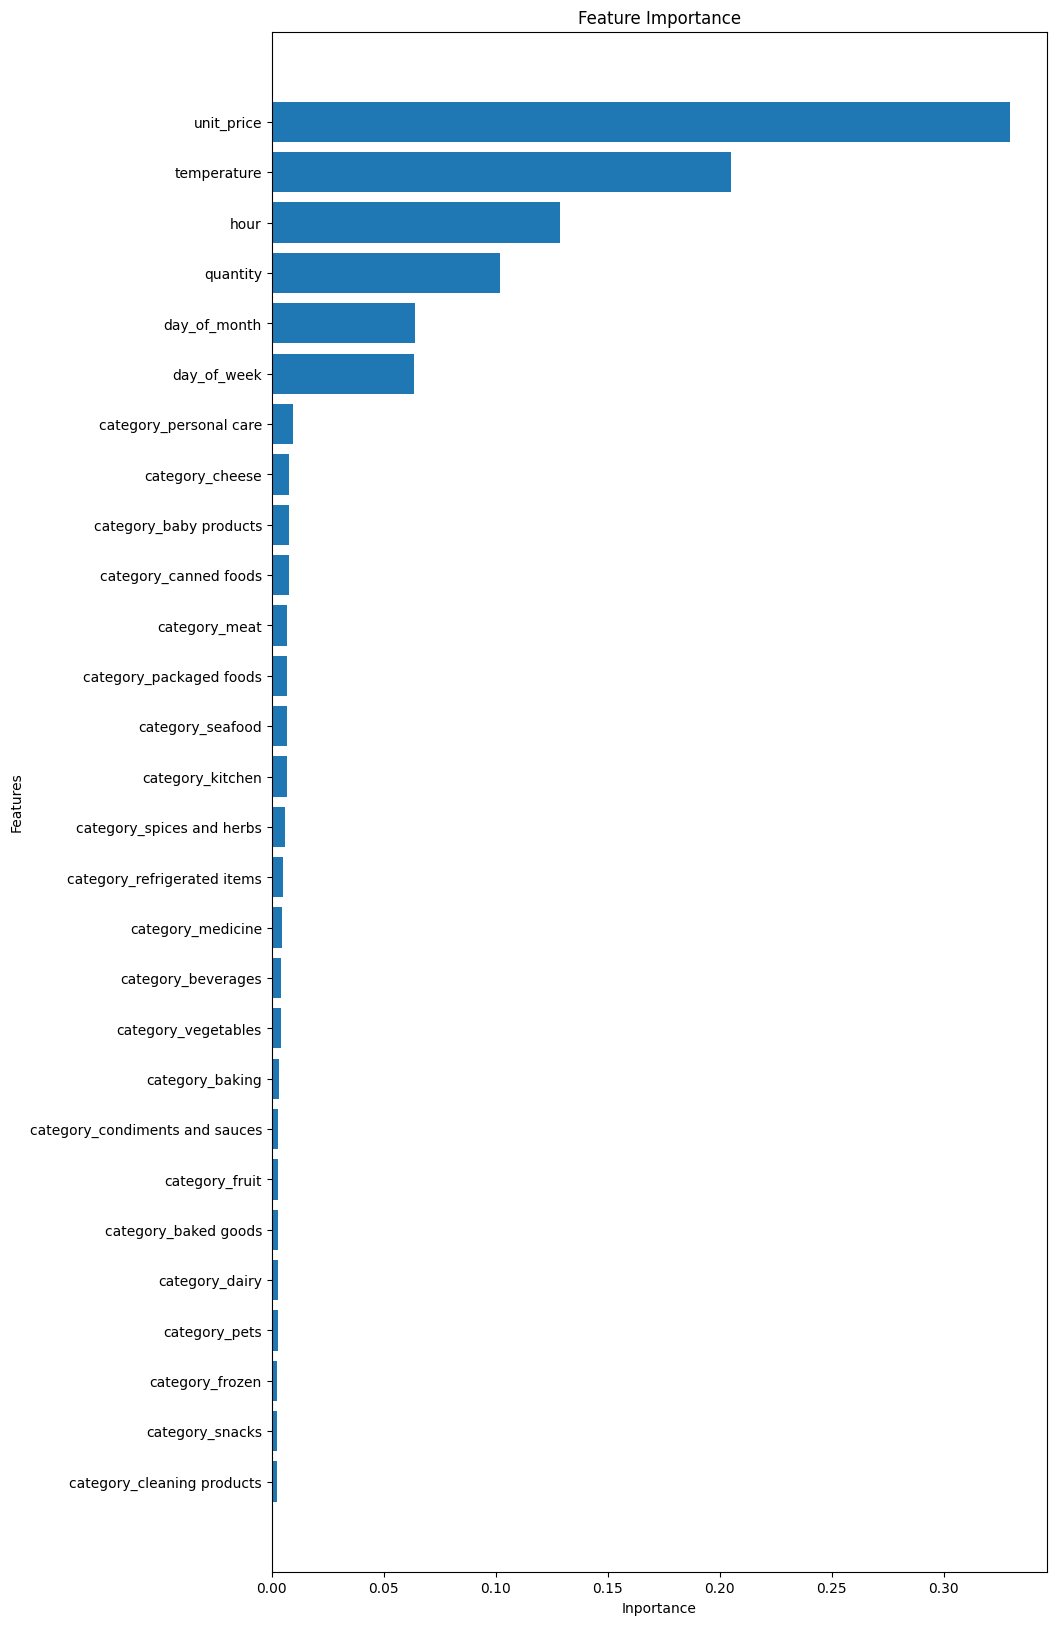

In [41]:
importance = model.feature_importances_
names = [i.split("__")[0] for i in x_train.columns]
indices = np.argsort(importance)[::1]

fig, ax = plt.subplots(figsize=(10, 20))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importance[indices], align = "center")
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.ylabel("Features")
plt.xlabel("Inportance")
plt.show()





In [42]:
merged_df.to_csv('new_dataset.csv', index = False)